# Beyond the Screen: Analysing Netflix Movie Data

![watching netflix](datasets/netflix.jpg)

---

## 1. Introduction 
Netflix, which began in 1997 as a DVD rental service, has transformed into the largest entertainment and media company by market capitalization. As of January 2021, Netflix boasts over 200 million subscribers, offering a vast library of movies and series that cater to diverse audiences worldwide. This immense growth and the platform's extensive catalog make it an ideal subject for data analysis, providing a unique opportunity to explore trends and patterns in the entertainment industry.

In this project, we will focus on analysing Netflix's movie data to uncover insights about how movie durations have evolved over time. We will leverage Python's powerful data manipulation libraries, particularly **pandas**, to organise and analyse the data. Our first step will be to create a Python dictionary to store the provided data, which we will later convert into a pandas DataFrame for more advanced analysis.

This notebook will guide you through the process of loading, exploring, and analysing the data to determine whether the average duration of Netflix movies has indeed been declining over the past decade.

---

## 2. Loading Data into a Dictionary 

A friend of ours, who has been honing their Python skills, has already taken a first look at a CSV file containing Netflix data. Their initial analysis suggests that the average duration of Netflix movies has been declining over the years. To support this claim, they have provided us with their data.

To begin our analysis, we'll first organize the data into a Python dictionary. This will allow us to easily convert it into a pandas DataFrame later. The data provided includes the average movie durations (in minutes) for Netflix movies from 2011 to 2020.

Here’s the data:
- **Years**: 2011 to 2020
- **Average Movie Durations**: 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90 minutes, respectively.

We'll create a dictionary with two keys: `"years"` and `"durations"`. Each key will map to a list of values representing the years and their corresponding average movie durations.

In [1]:
# Create the years and durations lists
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict = {"years":years, "durations":durations}

# Print the dictionary
movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

Now that the data is stored in a dictionary, we can proceed to load it into a pandas DataFrame for further analysis.

---

## 3. Creating a DataFrame from a Dictionary

Now that we've organised our data into a Python dictionary (`movie_dict`), the next step is to convert it into a pandas DataFrame. This will allow us to leverage pandas' powerful data manipulation and analysis capabilities. To do this, we'll first import the pandas library under its standard alias, `pd`. After creating the DataFrame, we'll inspect it to ensure it was created correctly.

Here’s how we can achieve this:

In [2]:
# Import the pandas library under its usual alias 'pd'
import pandas as pd

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Display the first few rows of the DataFrame to inspect it
print(durations_df.head())

   years  durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100


---

## 4. A Visual Inspection of Our Data

Now that we have our data in a pandas DataFrame, the next step is to visually inspect it to identify any trends or patterns. Specifically, we want to investigate whether the average duration of Netflix movies has been declining over time, as our friend suggested. Since our data is continuous—a series of average movie durations over consecutive years—a **line plot** is an excellent choice for visualisation. This type of plot will allow us to clearly observe how movie durations have changed over the years, with the years represented on the x-axis and the average duration in minutes on the y-axis.

There are many libraries available for data visualisation in Python, but one of the most widely used is **matplotlib.pyplot**. We'll use this library to create our line plot.

Here’s how we can create and display the plot:

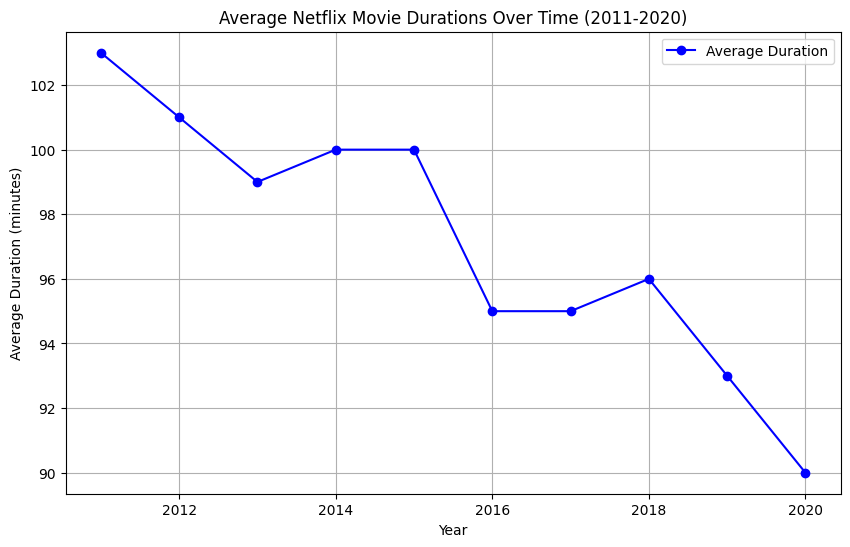

In [3]:
# Import the matplotlib.pyplot library under the alias 'plt'
import matplotlib.pyplot as plt

# Create a line plot of the data
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(durations_df['years'], durations_df['durations'], marker='o', linestyle='-', color='b', label='Average Duration')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')
plt.title('Average Netflix Movie Durations Over Time (2011-2020)')

# Add a grid for better readability
plt.grid(True)

# Display the plot
plt.legend()  # Show the legend
plt.show()

#### Observations:

By examining the plot, we see a noticeable trend in the average duration of Netflix movies over the years. As the line slopes downward, it supports the hypothesis that movie durations have been decreasing over time.

---

## 5. Loading the Rest of the Data from a CSV

While our initial analysis using aggregated data suggests that Netflix movie durations have decreased over the past decade, we are limited in the depth of our exploration. For instance, we cannot yet answer questions such as:
- What does this trend look like over a longer period of time?
- Is the trend influenced by factors like the genre of the movies?

To address these questions, we need access to the full dataset. Fortunately, our friend has provided us with the original CSV file they used for their analysis. The file is located at the path `"datasets/netflix_data.csv"`. We will now load this CSV file into a pandas DataFrame to gain access to the complete dataset.

Since the dataset is likely large, printing the entire DataFrame would be impractical. Instead, we will inspect the data by printing only the first five rows using the `.head()` method. This will give us a glimpse of the structure and contents of the dataset.

Here’s how we can load and inspect the data:

In [4]:
# Load the CSV file into a pandas DataFrame
netflix_df = pd.read_csv("datasets/netflix_data.csv")

# Display the first five rows of the DataFrame
print(netflix_df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123

---

## 6. Filtering for Movies!

Now that we have our full dataset loaded, we’re ready to dive into analysing movie lengths. However, upon inspecting the first few rows of the DataFrame, we notice that the dataset includes both **Movies** and **TV Shows**, as indicated by the `type` column. Additionally, the `duration` column appears to represent different values depending on the type of content: for movies, it likely represents the duration in minutes, while for TV shows, it might represent the number of seasons. Since our focus is on analysing movie lengths, we need to filter the data to include only movies.

Fortunately, pandas makes it easy to filter rows based on specific conditions. We’ll create a new DataFrame, `netflix_df_movies_only`, that contains only the rows where the `type` is `"Movie"`. While we’re at it, we’ll also narrow down the columns to only those relevant to our analysis: `title`, `country`, `genre`, `release_year`, and `duration`.

Here’s how we can achieve this:


In [6]:
# Filter the DataFrame to include only movies
netflix_df_movies_only = netflix_df[netflix_df["type"]=="Movie"]

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[["title", "country", "genre", "release_year", "duration"]]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


---

## 7. Creating a Scatter Plot

Now that we’ve filtered our dataset to include only movies and selected the relevant columns, we’re ready to visualise the data to gain insights into how movie durations have changed over time. Unlike our previous analysis, which used aggregated data (average durations per year), we’re now working with individual movie data. This means a **line plot** is no longer suitable, as it’s designed to show trends in aggregated or continuous data. Instead, a **scatter plot** is a better choice for visualising individual data points, allowing us to observe the distribution of movie durations across different years.

In this scatter plot, we’ll plot the **release year** on the x-axis and the **movie duration** (in minutes) on the y-axis. This will help us identify any patterns, trends, or outliers in the data over a longer time period.

Here’s how we can create the scatter plot using `matplotlib.pyplot`:

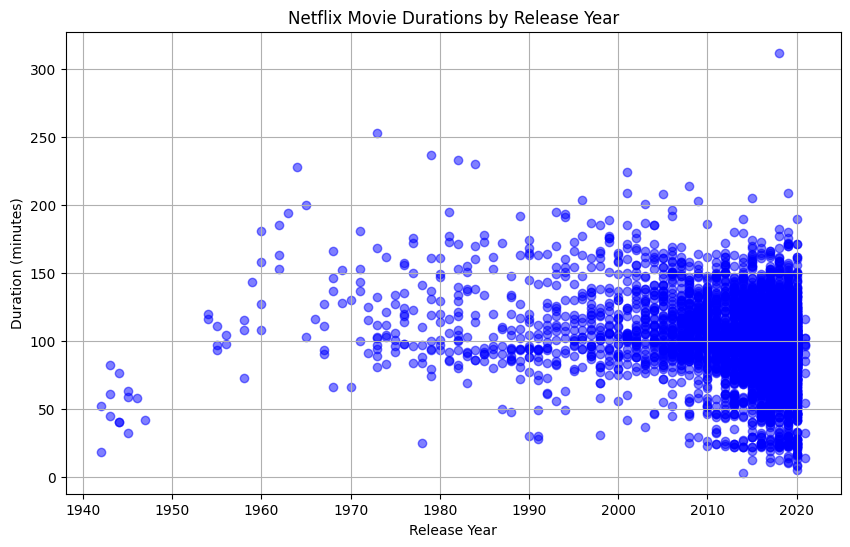

In [7]:
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(netflix_movies_col_subset['release_year'], netflix_movies_col_subset['duration'], alpha=0.5, color='b')

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.title('Netflix Movie Durations by Release Year')

# Add a grid for better readability
plt.grid(True)

# Display the plot
plt.show()

#### Observations:
By examining the scatter plot, we can:
- Identify trends or patterns in movie durations over time.
- Spot any outliers or unusual data points.
- Assess the overall distribution of movie durations across different years.

---

## 8. Digging Deeper

While our scatter plot provides a clearer picture of how movie durations have evolved over time, it also reveals some interesting details. Specifically, we notice that there are many movies with durations under 60 minutes, particularly in recent years. These shorter films could be influencing the overall trend of decreasing average movie durations. To better understand this phenomenon, let’s filter our DataFrame to isolate movies with durations under 60 minutes and examine their genres. This might help us identify whether certain types of movies are contributing to the decline in average durations.

Here’s how we can filter the data and analyse the genres of shorter movies:

In [8]:
# Filter for movies with a duration under 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration'] < 60]

# Display the first 10 rows of the short_movies
print(short_movies.head(10))

                                                 title        country  \
35                                           #Rucker50  United States   
55                 100 Things to do Before High School  United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...            NaN   
101                                  3 Seconds Divorce         Canada   
146                                     A 3 Minute Hug         Mexico   
162  A Christmas Special: Miraculous: Tales of Lady...         France   
171                         A Family Reunion Christmas  United States   
177                    A Go! Go! Cory Carson Christmas  United States   
178                    A Go! Go! Cory Carson Halloween            NaN   
179                  A Go! Go! Cory Carson Summer Camp            NaN   

             genre  release_year  duration  
35   Documentaries          2016        56  
55   Uncategorized          2014        44  
67   Uncategorized          2017        37  
101  Documentari


#### Analysing the Genres of Short Movies
To gain further insight, let’s examine the distribution of genres among these shorter movies. We can use the `value_counts()` method to count the occurrences of each genre:

In [9]:
# Count the occurrences of each genre in the short_movies DataFrame
genre_counts = short_movies['genre'].value_counts()

# Display the genre counts
print(genre_counts)

genre
Documentaries           151
Children                107
Stand-Up                 72
Uncategorized            40
Comedies                 15
Dramas                   12
Classic Movies            8
Action                    6
International Movies      3
Anime Features            3
Music                     2
Horror Movies             1
Name: count, dtype: int64


#### Observations:
1. **Documentaries**: A significant portion of the shorter movies are documentaries. These films often have shorter runtimes due to their focused subject matter and storytelling style.
2. **Children’s Movies**: Many shorter films are targeted at children, as younger audiences may have shorter attention spans.
3. **Stand-Up Comedy**: Stand-up specials, which are often categorized as movies on Netflix, typically have shorter durations.
4. **International Movies and Comedies**: Some shorter films fall into these categories, possibly reflecting cultural differences in storytelling or production.

#### Implications:
The prevalence of shorter movies in genres like documentaries, children’s films, and stand-up comedy suggests that these categories are contributing to the overall decline in average movie durations. This insight highlights the importance of considering genre when analysing trends in movie lengths.

---

## 9. Marking Non-Feature Films

As we’ve discovered, many of the movies with durations under 60 minutes fall into genres such as **Children**, **Stand-Up**, and **Documentaries**. These genres are inherently shorter in length compared to traditional feature films like Hollywood blockbusters, which typically run for 90 minutes or more. While we could eliminate these rows from our DataFrame to focus solely on feature films, another insightful approach is to visualise these non-feature films distinctly. By marking them with a different color in our scatter plot, we can better understand their impact on the overall trend of movie durations.

To achieve this, we’ll create a list of colors where each movie is assigned a color based on its genre. Specifically, we’ll mark non-feature films (e.g., Children, Stand-Up, Documentaries) with a distinct color, while all other movies will share a default color. This approach allows us to visually differentiate between traditional feature films and other types of content.

Here’s how we can implement this:

In [10]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for genre in netflix_movies_col_subset["genre"]:
    if genre=="Children":
        colors.append("red")
    elif genre=="Documentaries":
        colors.append("blue")
    elif genre=="Stand-Up":
        colors.append("green")
    else:
        colors.append("black")
        
# Inspect the first 10 values in your list        
colors[0:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'blue']

---

## 10. Plotting with Color!

Now that we’ve created a `colors` list to distinguish between feature films and non-feature films, we’re ready to enhance our scatter plot with this color-coding. This will allow us to visually inspect whether genres like **Children**, **Stand-Up**, and **Documentaries** are contributing to the decline in average movie durations. To make our plot even more polished and informative, we’ll also add detailed axis labels and apply a visually appealing theme using `plt.style.use()`.

Here’s how we can create the enhanced scatter plot:

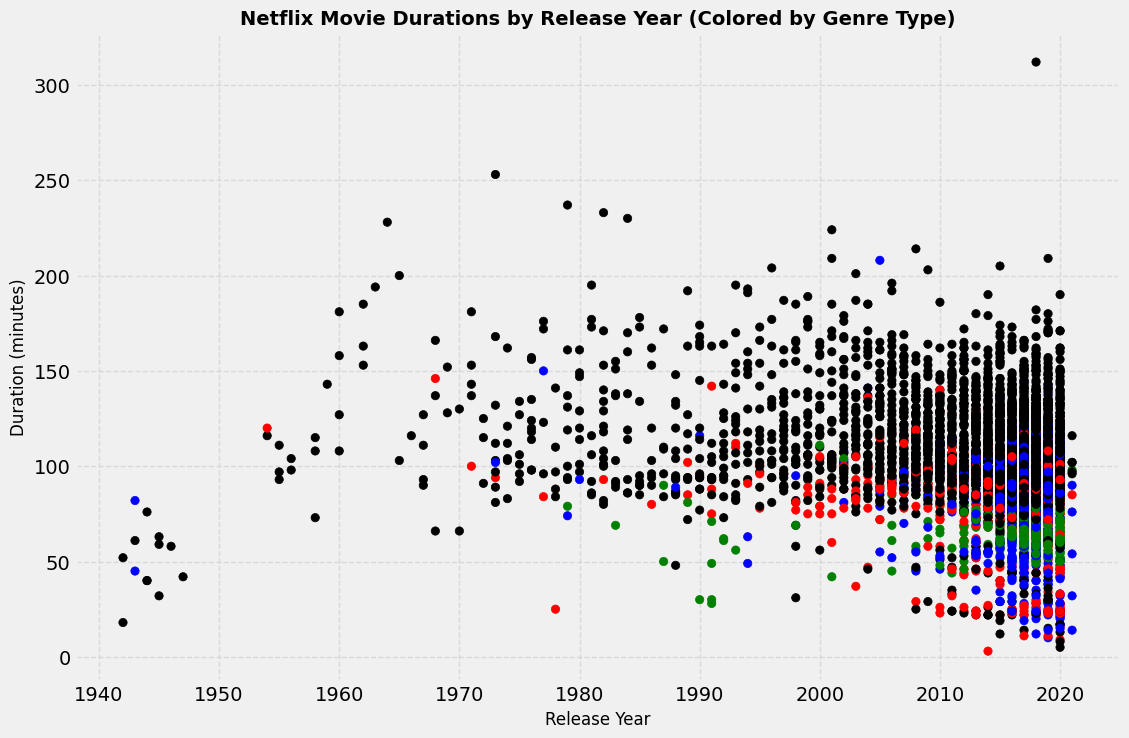

In [15]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"], color=colors)

# Add detailed axis labels and title
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Duration (minutes)', fontsize=12)
plt.title('Netflix Movie Durations by Release Year (Colored by Genre Type)', fontsize=14, fontweight='bold')

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()


#### Observations:
- The scatter plot now clearly distinguishes between feature films and non-feature films, making it easy to identify patterns and trends.
- We can observe that shorter movies (e.g., those under 60 minutes) are predominantly non-feature films.
- We can observe that the non-feature films are concentrated in recent years, this could explain the decline in average movie durations.

---

## 11. What is Next?

Our exploratory analysis of Netflix movie data has provided valuable insights into how movie durations have evolved over time. By visualising the data with a color-coded scatter plot, we observed that non-typical genres such as **Children’s movies**, **Stand-Up comedy**, and **Documentaries** are clustered in the lower half of the plot, indicating shorter durations. This suggests that these genres may be contributing to the overall decline in average movie durations, particularly in recent years. However, while our visual analysis points to this trend, we cannot draw definitive conclusions without further statistical analysis and exploration.

This project has demonstrated the power of Python and its data science libraries, such as **pandas** and **matplotlib**, for analysing and visualising complex datasets. By filtering, subsetting, and visualising the data, we’ve uncovered patterns that raise new questions and opportunities for deeper investigation. For example:
- How do movie durations vary by genre, country, or production studio?
- Are there regional differences in the types of movies being produced and consumed?
- How do TV shows compare to movies in terms of duration and popularity?

In [16]:
# Are we certain that movies are getting shorter?
are_movies_getting_shorter = 'no'

---

## 12. Acknowledgements

This project was conducted as part of the project portfolio for **DataCamp's Data Scientist with Python Career Track**. The analysis, insights, and visualisations presented here were made possible using the dataset provided by DataCamp. Special thanks to DataCamp for their comprehensive curriculum and resources, which have been instrumental in developing the data analysis and visualisation skills demonstrated in this project.

I am grateful for the opportunity to apply these skills to a real-world dataset and to contribute to the growing field of data science. 

---